In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'


In [3]:
!wget $url -o download_week2.log

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [32]:
df = pd.read_csv('course_lead_scoring.csv')

In [7]:
df.head(2).T

,0,1
lead_source,paid_ads,social_media
industry,NaN,retail
number_of_courses_viewed,1,1
annual_income,79450.0,46992.0
employment_status,unemployed,employed
location,south_america,south_america
interaction_count,4,1
lead_score,0.94,0.8
converted,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lead_source               1334 non-null   object 
 1   industry                  1328 non-null   object 
 2   number_of_courses_viewed  1462 non-null   int64  
 3   annual_income             1281 non-null   float64
 4   employment_status         1362 non-null   object 
 5   location                  1399 non-null   object 
 6   interaction_count         1462 non-null   int64  
 7   lead_score                1462 non-null   float64
 8   converted                 1462 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 102.9+ KB


## Data preparation
* Check if the missing values are presented in the features.
* If there are missing values:
    * For categorical features, replace them with 'NA'
    * For numerical features, replace with with 0.0

In [11]:
df.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [18]:
def missing_replace(l, val):
    for col in l:
        df[col].fillna(val, inplace=True)
    return df
    

In [21]:
l = [col for col in df.columns if df[col].dtypes =='O' and df[col].isna().sum() != 0]
val = 'NA'
df = missing_replace(l, val)


/tmp/ipykernel_23310/3076195048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val, inplace=True)


In [23]:
l = [col for col in df.columns if df[col].dtypes !='O' and df[col].isna().sum() != 0]
val = 0.0
df = missing_replace(l, val)

/tmp/ipykernel_23310/3076195048.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(val, inplace=True)


In [24]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

### Question 1
What is the most frequent observation (mode) for the column industry?

In [25]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

### Question 2
Create the correlation matrix for the numerical features of your dataset. In a correlation matrix, you compute the correlation coefficient between every pair of features.

**What are the two features that have the biggest correlation?**

- interaction_count and lead_score
- number_of_courses_viewed and lead_score
- number_of_courses_viewed and interaction_count
- annual_income and interaction_count

Only consider the pairs above when answering this question

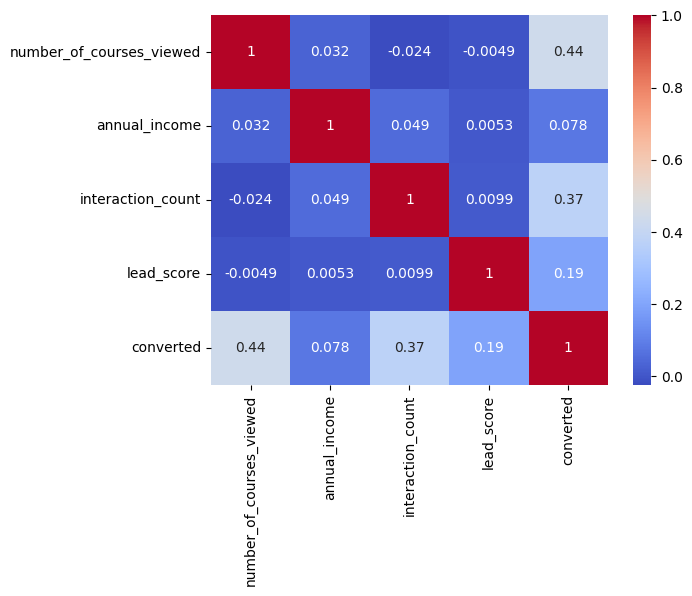

In [45]:
# nueric columns
num_cols = [col for col in df.columns if df[col].dtypes != 'O']

sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Result: annual_income and interaction_count

## Split Data

In [48]:
from sklearn.model_selection import train_test_split

In [ ]:
X = 